<a href="https://www.kaggle.com/code/kinbaa/extratrees-classifier-auc-99?scriptVersionId=131332476" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes Classification 

# Imports


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Stats for the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


## Getting the unique values in the column 

In [5]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [6]:
df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [7]:
df = df.astype({'age':'int'})
# changing the age to int

# Finding the correlation 

In [8]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


/tmp/ipykernel_20/2178296406.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

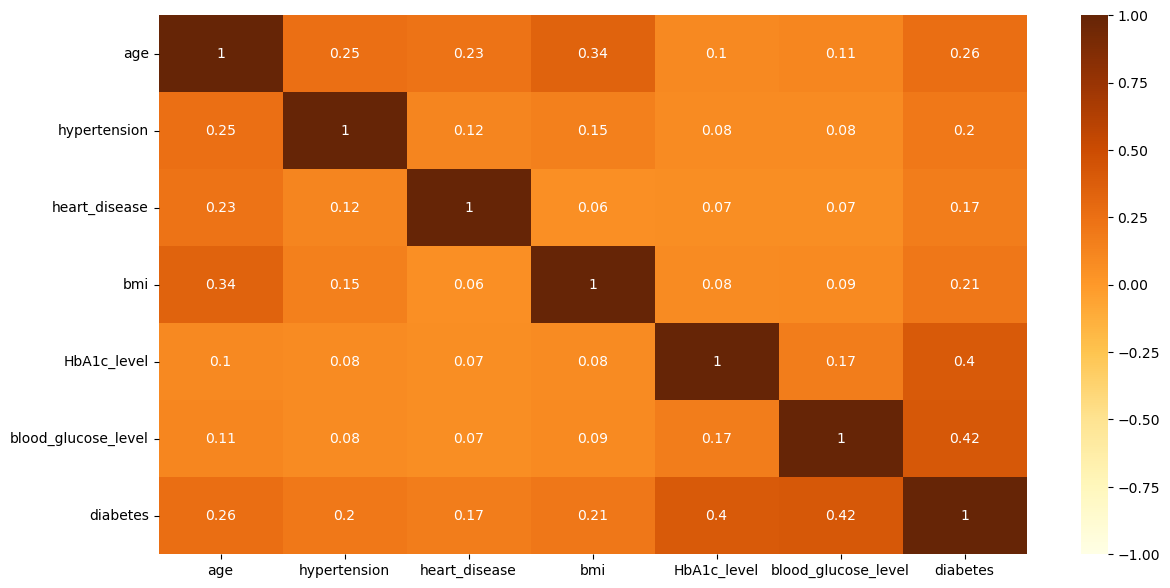

In [9]:
fig, ax = plt.subplots(figsize = (14,7))
corr = df.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='YlOrBr')

## Plot of people with and without diabetes
* There is a huge difference between people with and without diabetes
* So the data should be random sampled 

<Axes: xlabel='diabetes', ylabel='count'>

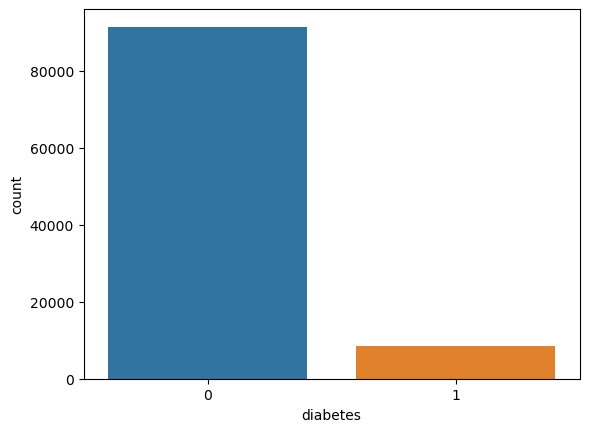

In [10]:
sns.countplot(x= 'diabetes', data=df)

## Changing the object values to int

In [11]:
df['gender'].replace(['Other', 'Male','Female'],
                        [0,1,2], inplace=True)

In [12]:
df['smoking_history'].replace(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
                        [0,1,2,3,4,5,], inplace=True)

In [13]:
#Removed Other because the values were very less
df = df[df['gender'] != 0]
df = df.reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int64  
 1   age                  99982 non-null  int64  
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  int64  
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 6.9 MB


# Plotting the data

In [15]:
cat_col = df[['gender', 'hypertension','heart_disease','smoking_history']]
num_col = df[['age','bmi','HbA1c_level','blood_glucose_level']]

df1 = df
df1 = df1.drop(columns=['diabetes', 'gender', 'hypertension','heart_disease','smoking_history'], axis=1)

## Univariate analysis for categorical variables

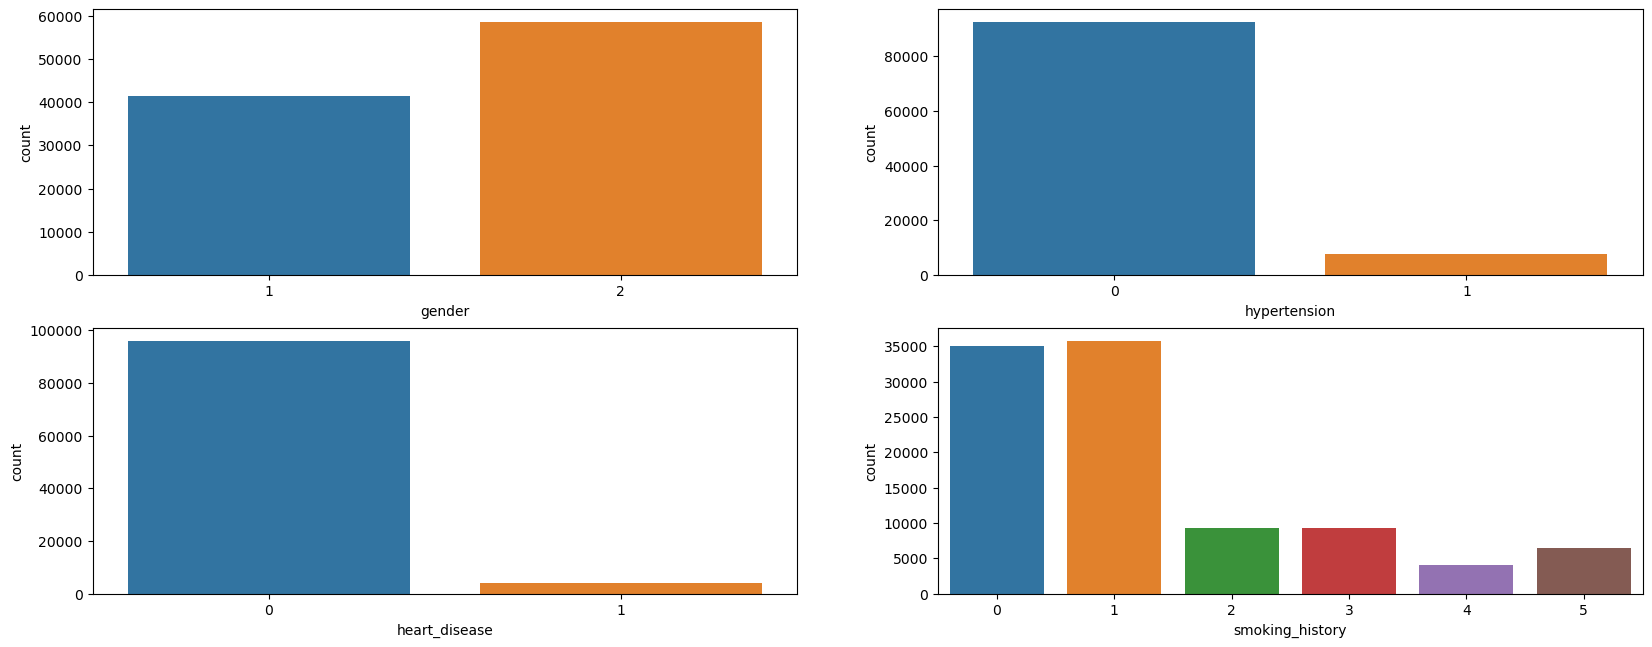

In [16]:
plt.figure(figsize=(20,20))

for i, col in enumerate(cat_col):
    plt.subplot(5, 2, i+1)
    sns.countplot(x= col, data=cat_col)

## Univariate analysis for numerical variables

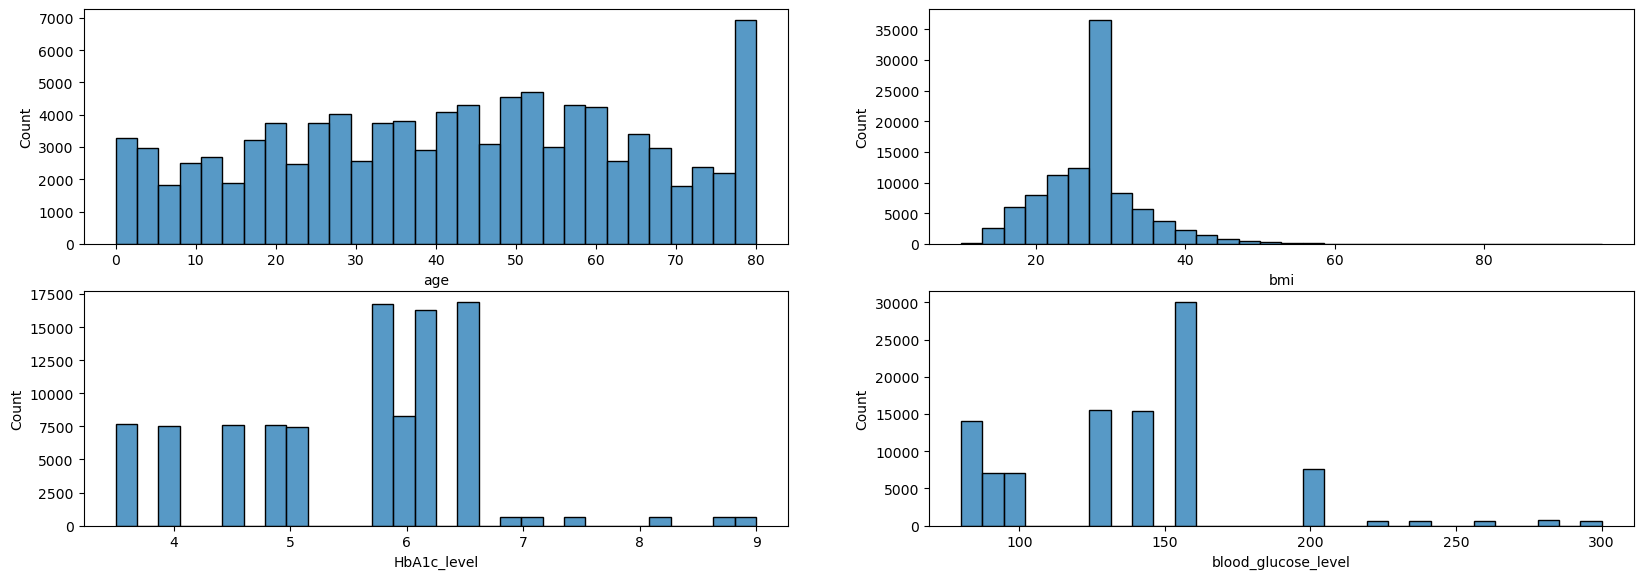

In [17]:
plt.figure(figsize=(20,25))

for i, col in enumerate(df1):
    plt.subplot(7, 2, i+1)
    sns.histplot(x= col, data=df1, bins=30)

In [18]:
# Independent and dependent variabels

Y = df['diabetes']
X = df.drop(['diabetes'], axis=1)

## Class Balancing


In [19]:
ros = RandomOverSampler(random_state=0)

X, Y = ros.fit_resample(X, Y)

<Axes: xlabel='diabetes', ylabel='count'>

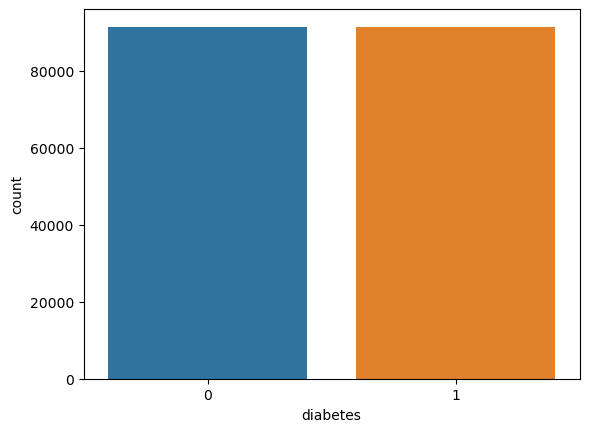

In [20]:
sns.countplot(x=Y)

## Normalizing numeric columns

In [21]:
sc = StandardScaler()
num_col = pd.DataFrame(sc.fit_transform(num_col), columns=num_col.columns)

num_col

,age,bmi,HbA1c_level,blood_glucose_level
0,1.691634,-0.321051,1.001692,0.047709
1,0.537908,-0.000114,1.001692,-1.426157
2,-0.615818,-0.000114,0.161089,0.489869
3,-0.260825,-0.583225,-0.492714,0.416175
4,1.514138,-1.081957,-0.679515,0.416175
...,...,...,...,...
99977,1.691634,-0.000114,0.628091,-1.180513
99978,-1.769544,-1.499326,0.908292,-0.934869
99979,1.070397,0.076730,0.161089,0.416175
99980,-0.793315,1.220350,-1.426718,-0.934869


In [22]:
num_col.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,99982.0,5.401097e-18,1.000005,-1.858293,-0.793315,0.049793,0.804153,1.691634
bmi,99982.0,1.885765e-16,1.000005,-2.608291,-0.556103,-0.000114,0.340411,10.301507
HbA1c_level,99982.0,7.179195e-16,1.000005,-1.893720,-0.679515,0.254489,0.628091,3.243301
blood_glucose_level,99982.0,3.141164e-17,1.000005,-1.426157,-0.934869,0.047709,0.514433,3.978018


# One hot encoding for categorical columns

In [23]:
cat_col_list = ['gender', 'hypertension','heart_disease','smoking_history']

X_dummy = pd.get_dummies(X, columns = cat_col_list)

X_dummy

,age,bmi,HbA1c_level,blood_glucose_level,gender_1,gender_2,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_0,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5
0,80,25.19,6.6,140,0,1,1,0,0,1,1,0,0,0,0,0
1,54,27.32,6.6,80,0,1,1,0,1,0,0,1,0,0,0,0
2,28,27.32,5.7,158,1,0,1,0,1,0,1,0,0,0,0,0
3,36,23.45,5.0,155,0,1,1,0,1,0,0,0,1,0,0,0
4,76,20.14,4.8,155,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182959,72,31.76,6.2,280,0,1,0,1,1,0,1,0,0,0,0,0
182960,80,27.80,6.8,200,0,1,0,1,1,0,0,0,0,1,0,0
182961,47,27.32,5.7,126,0,1,1,0,1,0,0,1,0,0,0,0
182962,46,69.39,5.7,159,0,1,1,0,1,0,1,0,0,0,0,0


In [24]:
num_col_list = ['age','bmi','HbA1c_level','blood_glucose_level']


num_col_scaled = pd.DataFrame(sc.fit_transform(X_dummy[num_col_list]), columns=num_col.columns)

num_col_scaled

,age,bmi,HbA1c_level,blood_glucose_level
0,1.369228,-0.571219,0.338508,-0.412023
1,0.161768,-0.284681,0.338508,-1.463272
2,-1.045692,-0.284681,-0.363439,-0.096648
3,-0.674166,-0.805293,-0.909397,-0.149210
4,1.183465,-1.250571,-1.065385,-0.149210
...,...,...,...,...
182959,0.997702,0.312611,0.026532,2.040894
182960,1.369228,-0.220109,0.494496,0.639227
182961,-0.163317,-0.284681,-0.363439,-0.657314
182962,-0.209758,5.374794,-0.363439,-0.079127


In [25]:
X = X_dummy.drop(columns=num_col_list)
X

,gender_1,gender_2,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_0,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5
0,0,1,1,0,0,1,1,0,0,0,0,0
1,0,1,1,0,1,0,0,1,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
182959,0,1,0,1,1,0,1,0,0,0,0,0
182960,0,1,0,1,1,0,0,0,0,1,0,0
182961,0,1,1,0,1,0,0,1,0,0,0,0
182962,0,1,1,0,1,0,1,0,0,0,0,0


In [26]:
X = pd.concat([X, num_col_scaled], axis=1)
X

,gender_1,gender_2,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_0,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5,age,bmi,HbA1c_level,blood_glucose_level
0,0,1,1,0,0,1,1,0,0,0,0,0,1.369228,-0.571219,0.338508,-0.412023
1,0,1,1,0,1,0,0,1,0,0,0,0,0.161768,-0.284681,0.338508,-1.463272
2,1,0,1,0,1,0,1,0,0,0,0,0,-1.045692,-0.284681,-0.363439,-0.096648
3,0,1,1,0,1,0,0,0,1,0,0,0,-0.674166,-0.805293,-0.909397,-0.149210
4,1,0,0,1,0,1,0,0,1,0,0,0,1.183465,-1.250571,-1.065385,-0.149210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182959,0,1,0,1,1,0,1,0,0,0,0,0,0.997702,0.312611,0.026532,2.040894
182960,0,1,0,1,1,0,0,0,0,1,0,0,1.369228,-0.220109,0.494496,0.639227
182961,0,1,1,0,1,0,0,1,0,0,0,0,-0.163317,-0.284681,-0.363439,-0.657314
182962,0,1,1,0,1,0,1,0,0,0,0,0,-0.209758,5.374794,-0.363439,-0.079127


# Train and Test data

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10, shuffle=True)

print("Size of X_train DataFrame: ", X_train.shape)
print("Size of X_val DataFrame: ", X_val.shape)
print("Size of Y_train DataFrame: ", Y_train.shape)
print("Size of Y_val DataFrame: ", Y_val.shape)

Size of X_train DataFrame:  (128074, 16)
Size of X_val DataFrame:  (54890, 16)
Size of Y_train DataFrame:  (128074,)
Size of Y_val DataFrame:  (54890,)


# Testing different Models

### Model 1: Logistic Regression

In [28]:
log_clf = LogisticRegression(max_iter=2000)
log_clf.fit(X_train, Y_train)
Y_pred_log_val = log_clf.predict(X_val)
auc_log_val_base = roc_auc_score(Y_val, Y_pred_log_val) 

print("Baseline logistic regression model AUC score:", auc_log_val_base)

Baseline logistic regression model AUC score: 0.883522359037732


### Model 2: Random Forest Classifier

In [29]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_pred_rf_val = rf_clf.predict(X_val)
auc_rf_val_base = roc_auc_score(Y_val, Y_pred_rf_val)

print("Baseline Random Forest model AUC score:", auc_rf_val_base)

Baseline Random Forest model AUC score: 0.9889549151494459


### Model 3: Gradient Boosting Classifier

In [30]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
Y_pred_gb_val = gb_clf.predict(X_val)
auc_gb_val_base = roc_auc_score(Y_pred_gb_val, Y_val)

print("Baseline Gradient Boosting model AUC score:", auc_gb_val_base)

Baseline Gradient Boosting model AUC score: 0.9149952311581804


### Model 4: K Nearest Neighbor (KNN) Classifier

In [31]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
Y_pred_knn_val = knn_clf.predict(X_val)
auc_knn_val_base = roc_auc_score(Y_pred_knn_val, Y_val)

print("Baseline K Nearest Neighbor model AUC score:", auc_knn_val_base)

Baseline K Nearest Neighbor model AUC score: 0.9583026632520675


### Model 5: XGBoost classifier


In [32]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train,Y_train)
Y_pred_xgb_val = xgb_clf.predict(X_val)
auc_xgb_val_base = roc_auc_score(Y_pred_xgb_val,Y_val)

print("Baseline xgb model AUC score:", auc_xgb_val_base)

Baseline xgb model AUC score: 0.9387682764426877


### Model 6: ExtraTrees Classifier

In [33]:
xt_clf = ExtraTreesClassifier()
xt_clf.fit(X_train, Y_train)
Y_pred_xt_val = xt_clf.predict(X_val)
auc_xt_val_base = roc_auc_score(Y_pred_xt_val, Y_val)

print("Baseline ExtraTrees Classifier model AUC score:", auc_xt_val_base)

Baseline ExtraTrees Classifier model AUC score: 0.9928934214360894


### Model 7: AdaBoost Classifier

In [34]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, Y_train)
Y_pred_ab_val = ab_clf.predict(X_val)
auc_ab_val_base = roc_auc_score(Y_pred_ab_val, Y_val)

print("Baseline AdaBoost Classifier model AUC score:", auc_ab_val_base)

Baseline AdaBoost Classifier model AUC score: 0.9125956150292471


### Model 8: VotingClassifier

In [35]:
estimators = []
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('XT', ExtraTreesClassifier()))

vt_clf = VotingClassifier(estimators = estimators, voting='soft')
vt_clf.fit(X_train, Y_train)
Y_pred_vt_val = vt_clf.predict(X_val)
auc_vt_val_base = roc_auc_score(Y_pred_vt_val, Y_val)

print("Baseline Voting Classifier model AUC score:", auc_vt_val_base)

Baseline Voting Classifier model AUC score: 0.9916406207073113


# Base Models Conclusion

In [36]:
base_models =['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'KNN classifier', 'XGBoost Classifier', 'ExtraTrees Classifier', 'AdaBoost Classifier', 'VotingClassifier']
auc_val = [auc_log_val_base, auc_rf_val_base, auc_gb_val_base, auc_knn_val_base, auc_xgb_val_base, auc_xt_val_base, auc_ab_val_base, auc_vt_val_base]

base_models_auc_scores = pd.DataFrame({'Model': base_models, 'Val_Set_AUC': auc_val,})
base_models_auc_scores

,Model,Val_Set_AUC
0,Logistic Regression,0.883522
1,Random Forest Classifier,0.988955
2,Gradient Boosting Classifier,0.914995
3,KNN classifier,0.958303
4,XGBoost Classifier,0.938768
5,ExtraTrees Classifier,0.992893
6,AdaBoost Classifier,0.912596
7,VotingClassifier,0.991641


# Grid Search

### Model 1: Random Forest Classifier

In [37]:
rf_clf = RandomForestClassifier()

param = {'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy'],
        }

rf_clf_cv = GridSearchCV(rf_clf, param_grid = param, scoring = 'roc_auc', cv=5, verbose=2)
rf_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=  10.5s
[CV] END ...................criterion=gini, n_estimators=100; total time=  10.9s
[CV] END ...................criterion=gini, n_estimators=100; total time=  10.6s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.0s
[CV] END ...................criterion=gini, n_estimators=200; total time=  21.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=  22.1s
[CV] END ...................criterion=gini, n_estimators=200; total time=  21.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=  22.2s
[CV] END ...................criterion=gini, n_estimators=200; total time=  21.3s
[CV] END ................criterion=entropy, n_estimators=100; total time=  11.2s
[CV] END ................criterion=entropy, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [38]:
rf_clf = RandomForestClassifier(**rf_clf_cv.best_params_)
rf_clf.fit(X_train, Y_train)
Y_pred_rf_train = rf_clf.predict(X_train)
Y_pred_rf_val = rf_clf.predict(X_val)

auc_rf_train = roc_auc_score(Y_train, Y_pred_rf_train) 
auc_rf_val = roc_auc_score(Y_val, Y_pred_rf_val)

print("AUC score for Random Forest training set: ", auc_rf_train)
print("AUC score for Random Forest validation set: ", auc_rf_val)

AUC score for Random Forest training set:  0.9993525336994508
AUC score for Random Forest validation set:  0.988516735057428


### Model 2: ExtraTrees Classifier

In [39]:
xt_clf = ExtraTreesClassifier()

param = {'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy'],
        }

xt_clf_cv = GridSearchCV(xt_clf, param_grid = param, scoring = 'roc_auc', cv=5, verbose=2)
xt_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.9s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.7s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.7s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.6s
[CV] END ...................criterion=gini, n_estimators=100; total time=  11.8s
[CV] END ...................criterion=gini, n_estimators=200; total time=  23.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=  23.3s
[CV] END ...................criterion=gini, n_estimators=200; total time=  23.6s
[CV] END ...................criterion=gini, n_estimators=200; total time=  23.0s
[CV] END ...................criterion=gini, n_estimators=200; total time=  24.0s
[CV] END ................criterion=entropy, n_estimators=100; total time=  11.5s
[CV] END ................criterion=entropy, n_est

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [40]:
xt_clf = ExtraTreesClassifier(**xt_clf_cv.best_params_)

xt_clf.fit(X_train, Y_train)
Y_pred_xt_train = xt_clf.predict(X_train)
Y_pred_xt_val = xt_clf.predict(X_val)
auc_xt_train = roc_auc_score(Y_pred_xt_train, Y_train)
auc_xt_val = roc_auc_score(Y_pred_xt_val, Y_val)

print("AUC score for ExtraTrees Classifier training set: ", auc_xt_train)
print("AUC score for ExtraTrees Classifier validation set: ", auc_xt_val)

AUC score for ExtraTrees Classifier training set:  0.9993521799534819
AUC score for ExtraTrees Classifier validation set:  0.9925575405200113


### Model 3: Voting Classifier

In [41]:
vt_clf = VotingClassifier(estimators=estimators)

param = {    
        'voting': ['soft'],
        }

vt_clf_cv = GridSearchCV(vt_clf, param_grid = param, scoring = 'roc_auc', cv=5, verbose=2)
vt_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................................voting=soft; total time=  23.1s
[CV] END ........................................voting=soft; total time=  22.9s
[CV] END ........................................voting=soft; total time=  22.7s
[CV] END ........................................voting=soft; total time=  23.0s
[CV] END ........................................voting=soft; total time=  23.1s


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('RF',
                                                     RandomForestClassifier()),
                                                    ('XT',
                                                     ExtraTreesClassifier())]),
             param_grid={'voting': ['soft']}, scoring='roc_auc', verbose=2)

In [42]:
vt_clf = VotingClassifier(estimators=estimators, **vt_clf_cv.best_params_)

vt_clf.fit(X_train, Y_train)
Y_pred_vt_train = vt_clf.predict(X_train)
Y_pred_vt_val = vt_clf.predict(X_val)
auc_vt_train = roc_auc_score(Y_pred_vt_train, Y_train)
auc_vt_val = roc_auc_score(Y_pred_vt_val, Y_val)

print("AUC score for Voting Classifier training set: ", auc_vt_train)
print("AUC score for Voting Classifier validation set: ", auc_vt_val)

AUC score for Voting Classifier training set:  0.9993521799534819
AUC score for Voting Classifier validation set:  0.9912537185131027


In [43]:
models =['Random Forest Classifier', 'ExtraTrees Classifier', 'Voting Classifier']
auc_train = [auc_rf_train, auc_xt_train, auc_vt_train]
auc_val = [auc_rf_val, auc_xt_val, auc_vt_val]

models_cv_scores = pd.DataFrame({'Model': models, 'Train_Set_AUC': auc_train, 'Val_Set_AUC': auc_val,})
models_cv_scores

,Model,Train_Set_AUC,Val_Set_AUC
0,Random Forest Classifier,0.999353,0.988517
1,ExtraTrees Classifier,0.999352,0.992558
2,Voting Classifier,0.999352,0.991254


# Final Model

In [44]:
auc_max = models_cv_scores['Val_Set_AUC'].max()
idx = models_cv_scores['Val_Set_AUC'].idxmax()
model_max = models_cv_scores.iloc[idx,0]

print("The best model is: ", model_max, ", with an AUC score of", auc_max)

The best model is:  ExtraTrees Classifier , with an AUC score of 0.9925575405200113
